visualize the roc curve of clam eval result

In [176]:
#import csv data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import glob
import re


In [177]:
csv_files = glob.glob('/data/dk/ucec/CLAM/eval_results/EVAL_eval_code/fold_*.csv')
fpr = {}
tpr = {}
roc_auc = []
label = []


In [178]:
for file in csv_files:
    data = pd.read_csv(file)
    y_test = pd.DataFrame()
    y_test['0'] = data['Y'].replace({0:1,1:0,2:0,3:0})
    y_test['1'] = data['Y'].replace({1:1,0:0,2:0,3:0})
    y_test['2'] = data['Y'].replace({2:1,0:0,1:0,3:0})
    y_test['3'] = data['Y'].replace({3:1,0:0,1:0,2:0})
    y_test = y_test.values
    y_score = data.iloc[:,3:8].values
    lb = re.search(r"fold_[0-9]", file).group()
    label.append(lb)
    fpr[f'{lb}_micro'], tpr[f'{lb}_micro'], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc.append(auc(fpr[f'{lb}_micro'],tpr[f'{lb}_micro']))

# plt.plot(fpr[f'{lb}_micro'],tpr[f'{lb}_micro'], label=f'{lb}(AUC = {roc_auc:.2f})')
# plt.legend()
# plt.show()


fold_3_micro
fold_2_micro
fold_1_micro
fold_4_micro
fold_5_micro


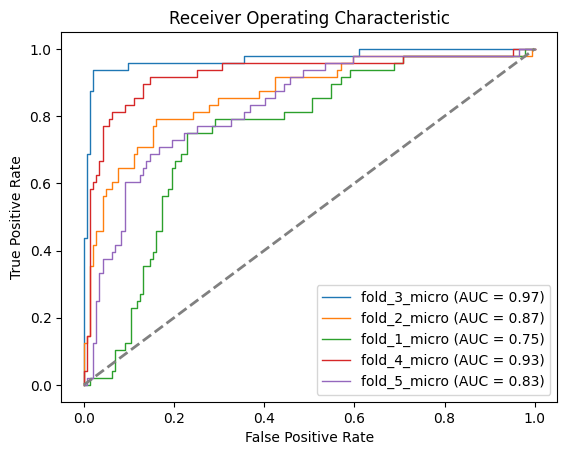

In [179]:
for model_name in fpr.keys():
    print(model_name)
    fpr_val = fpr[model_name]
    tpr_val = tpr[model_name]
    auc_value = auc(fpr_val, tpr_val)
    plt.plot(fpr_val, tpr_val, label='{} (AUC = {:.2f})'.format(model_name, auc_value), linewidth=1)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('/data/dk/ucec/fig/roc_plot.png', dpi=300, bbox_inches='tight')
plt.show()
